<a href="https://colab.research.google.com/github/AccomplishedCode/NYC_Target_Demographics/blob/main/Demographic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demographic Analysis on Filtered Target Locations

## What data we will be using

Here we will load the csv files I've cleaned from the shared drive folder. 
There will be 6 files that we will analyze, 3 of them containing patterns for Target locations specifically for the months of July 2019/2020 and March 2021. The other 3 contain neighborhood patterns, which are for the parent CBGs of our target locations. The idea here is to see how many  of the visitors of that CBG go to Target. 

After that, we don't need to focus much on the neighborhood patterns. We can focus on demographic patterns on our 3 Target POI csv files. 

Fortunately, the Safegraph people have a library of functions which automatically does the heavy lifting for us. They also provide a way to directly load the open census data from their public GDrive, which I will be doing here as well. But we also have that data on our drive folder if you feel like diving deeper. 

## Beginning the Data Import 

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# special libraries to allow file access
from google.colab import drive as mountGoogleDrive 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
your_name = "Parth" # << You should edit this

################################
print(f"Hello {your_name}, you will be asked to authenticate twice, once for Google File Stream and once for Google Cloud SDK.\nYou may have to click on two separate links, and copy/paste two codes, serially.")
################################
# These commands allow the notebook to read your data from your GoogleDrive
mountGoogleDrive.mount('/content/mountedDrive')
print(f"Congrats {your_name}, you mounted your google drive!")
################################
# These commands allow you to read directly from SafeGraph's public GoogleDrive containing Census Data
auth.authenticate_user()  # Authenticate and create the PyDrive client. 
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
print("You are fully authenticated!".format(your_name))

Hello Parth, you will be asked to authenticate twice, once for Google File Stream and once for Google Cloud SDK.
You may have to click on two separate links, and copy/paste two codes, serially.
Mounted at /content/mountedDrive
Congrats Parth, you mounted your google drive!
You are fully authenticated!


In [ ]:
i_want_to_use_my_own_patterns_data = True
patterns_directory_drive = "/content/mountedDrive/My Drive/Safegraph_Data/filtered_poi_data/July_2019"  # path to monthly patterns data

# ~~~~~~
if(i_want_to_use_my_own_patterns_data):
  print(f"OK, {your_name}! We will read patterns data from: {patterns_directory_drive}\nTesting that drive is mounted and we can find the data...")
  test = pd.read_csv(os.path.join(patterns_directory_drive, 'home_panel_summary.csv'))
  print("SUCCESS! We found your Patterns data!")
  print("Census Data will be read from SafeGraph's GDrive object: {0}".format(drive))
else:
  print(f"Great, {your_name}! We will use the Default Notebook Data located in GDrive object: {drive}")
  patterns_directory_drive=None

OK, Parth! We will read patterns data from: /content/mountedDrive/My Drive/Safegraph_Data/filtered_poi_data/July_2019
Testing that drive is mounted and we can find the data...
SUCCESS! We found your Patterns data!
Census Data will be read from SafeGraph's GDrive object: <pydrive.drive.GoogleDrive object at 0x7f91d55f72d0>


In [ ]:
july_19_path= patterns_directory_drive+ '/target_pois_07_19.csv'
jul_19= pd.read_csv(july_19_path)
jul_19

,safegraph_place_id,location_name,street_address,city,region,postal_code,safegraph_brand_ids,brands,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_work_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type
0,sg:f189f91419974d03a20257132d73da58,Target,519 Gateway Dr,Brooklyn,NY,11239,SG_BRAND_42aefbae01d2dfd981f7da7d823d689e,Target,2019-07-01T00:00:00-04:00,2019-08-01T00:00:00-04:00,7403,5257,"[214,230,259,253,247,301,255,217,213,213,197,2...",3.604711e+11,"{""360471070001"":46,""360471220002"":33,""36047105...","{""360471070001"":49,""360471058044"":26,""36047122...","{""360610009001"":19,""360470011001"":15,""36047107...","{""US"":5188,""EG"":4,""CA"":4}",4643.0,23.0,"{""<5"":78,""5-20"":2833,""21-60"":3369,""61-240"":971...","{""T.J. Maxx"":8,""JCPenney"":7,""BJ's Wholesale Cl...","{""Dunkin'"":41,""McDonald's"":34,""BP"":29,""BJ's Wh...","[80,46,45,44,44,49,71,120,291,423,613,761,922,...","{""Monday"":1059,""Tuesday"":1079,""Wednesday"":1078...","{""android"":2532,""ios"":2712}"
1,sg:e2543bebe82742a1941c21660d9f4168,Target,500 E 14th St,New York,NY,10009,SG_BRAND_42aefbae01d2dfd981f7da7d823d689e,Target,2019-07-01T00:00:00-04:00,2019-08-01T00:00:00-04:00,1527,938,"[44,44,57,36,41,52,88,52,48,50,45,59,42,62,59,...",3.606100e+11,"{""360610044006"":28,""360610028004"":20,""36061004...","{""360610044006"":20,""360610044003"":16,""36061003...","{""360610048006"":9,""360810001001"":7,""3606100090...","{""US"":864,""AU"":5,""PY"":4,""CN"":4,""MX"":4,""IL"":4,""...",3368.0,20.0,"{""<5"":44,""5-20"":727,""21-60"":399,""61-240"":238,""...","{""Chipotle Mexican Grill"":8}","{""Starbucks"":42,""Dunkin'"":35,""sweetgreen"":27,""...","[93,84,83,75,78,86,104,105,94,103,116,148,151,...","{""Monday"":242,""Tuesday"":234,""Wednesday"":239,""T...","{""android"":391,""ios"":541}"
2,sg:1cca2eb93802407a8a872a78db5fdf71,Target,112 W 34th St,New York,NY,10120,SG_BRAND_42aefbae01d2dfd981f7da7d823d689e,Target,2019-07-01T00:00:00-04:00,2019-08-01T00:00:00-04:00,6350,4739,"[205,223,256,143,249,173,176,176,187,225,218,2...",3.606101e+11,"{""360610101001"":47,""360610137003"":31,""36061011...","{""360610101001"":149,""360610109001"":103,""360610...","{""360610101001"":116,""360610109001"":95,""3606101...","{""US"":4448,""BR"":16,""CA"":12,""AR"":10,""AE"":9,""TZ""...",13792.0,23.0,"{""<5"":109,""5-20"":2573,""21-60"":2036,""61-240"":11...","{""Starbucks"":8,""sweetgreen"":6}","{""Starbucks"":46,""Dunkin'"":36,""sweetgreen"":32,""...","[28,12,9,11,10,18,29,77,305,589,800,938,1139,1...","{""Monday"":973,""Tuesday"":1059,""Wednesday"":1155,...","{""android"":1484,""ios"":3233}"
3,sg:fcf8054ca0eb4daa8fa77bd2ea68987f,Target,517 E 117th Streetsuite 201,New York,NY,10035,SG_BRAND_42aefbae01d2dfd981f7da7d823d689e,Target,2019-07-01T00:00:00-04:00,2019-08-01T00:00:00-04:00,578,439,"[16,12,27,14,11,24,27,17,25,11,18,19,25,24,15,...",3.606102e+11,"{""360610194001"":11,""360610180001"":9,""360050213...","{""360610178001"":9,""360610182003"":9,""3606101780...","{""360610196003"":6,""360610178003"":6,""3608104070...","{""US"":433}",1821.0,20.0,"{""<5"":15,""5-20"":288,""21-60"":154,""61-240"":61,"">...","{""PetSmart"":20,""McDonald's"":11,""Tumi"":9,""New Y...","{""PetSmart"":47,""Planet Fitness"":46,""Dunkin'"":4...","[7,5,5,5,4,2,3,5,10,36,59,87,120,132,131,128,1...","{""Monday"":85,""Tuesday"":88,""Wednesday"":89,""Thur...","{""android"":312,""ios"":127}"
4,sg:eb96ed984b274a57ae29762d73738d99,Target,1715 E 13th St,Brooklyn,NY,11229,SG_BRAND_42aefbae01d2dfd981f7da7d823d689e,Target,2019-07-01T00:00:00-04:00,2019-08-01T00:00:00-04:00,2228,1327,"[97,58,77,53,73,72,67,93,67,64,53,90,71,77,86,...",3.604706e+11,"{""360470554001"":57,""360470546002"":24,""36047055...","{""360470554001"":51,""360470554002"":19,""36047054...","{""360470642001"":17,""360470552003"

In [ ]:
july_19_path= patterns_directory_drive+ '/target_pois_07_19.csv'
jul_19= pd.read_csv(july_19_path)
jul_19

,safegraph_place_id,location_name,street_address,city,region,postal_code,safegraph_brand_ids,brands,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_work_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type
0,sg:f189f91419974d03a20257132d73da58,Target,519 Gateway Dr,Brooklyn,NY,11239,SG_BRAND_42aefbae01d2dfd981f7da7d823d689e,Target,2019-07-01T00:00:00-04:00,2019-08-01T00:00:00-04:00,7403,5257,"[214,230,259,253,247,301,255,217,213,213,197,2...",3.604711e+11,"{""360471070001"":46,""360471220002"":33,""36047105...","{""360471070001"":49,""360471058044"":26,""36047122...","{""360610009001"":19,""360470011001"":15,""36047107...","{""US"":5188,""EG"":4,""CA"":4}",4643.0,23.0,"{""<5"":78,""5-20"":2833,""21-60"":3369,""61-240"":971...","{""T.J. Maxx"":8,""JCPenney"":7,""BJ's Wholesale Cl...","{""Dunkin'"":41,""McDonald's"":34,""BP"":29,""BJ's Wh...","[80,46,45,44,44,49,71,120,291,423,613,761,922,...","{""Monday"":1059,""Tuesday"":1079,""Wednesday"":1078...","{""android"":2532,""ios"":2712}"
1,sg:e2543bebe82742a1941c21660d9f4168,Target,500 E 14th St,New York,NY,10009,SG_BRAND_42aefbae01d2dfd981f7da7d823d689e,Target,2019-07-01T00:00:00-04:00,2019-08-01T00:00:00-04:00,1527,938,"[44,44,57,36,41,52,88,52,48,50,45,59,42,62,59,...",3.606100e+11,"{""360610044006"":28,""360610028004"":20,""36061004...","{""360610044006"":20,""360610044003"":16,""36061003...","{""360610048006"":9,""360810001001"":7,""3606100090...","{""US"":864,""AU"":5,""PY"":4,""CN"":4,""MX"":4,""IL"":4,""...",3368.0,20.0,"{""<5"":44,""5-20"":727,""21-60"":399,""61-240"":238,""...","{""Chipotle Mexican Grill"":8}","{""Starbucks"":42,""Dunkin'"":35,""sweetgreen"":27,""...","[93,84,83,75,78,86,104,105,94,103,116,148,151,...","{""Monday"":242,""Tuesday"":234,""Wednesday"":239,""T...","{""android"":391,""ios"":541}"
2,sg:1cca2eb93802407a8a872a78db5fdf71,Target,112 W 34th St,New York,NY,10120,SG_BRAND_42aefbae01d2dfd981f7da7d823d689e,Target,2019-07-01T00:00:00-04:00,2019-08-01T00:00:00-04:00,6350,4739,"[205,223,256,143,249,173,176,176,187,225,218,2...",3.606101e+11,"{""360610101001"":47,""360610137003"":31,""36061011...","{""360610101001"":149,""360610109001"":103,""360610...","{""360610101001"":116,""360610109001"":95,""3606101...","{""US"":4448,""BR"":16,""CA"":12,""AR"":10,""AE"":9,""TZ""...",13792.0,23.0,"{""<5"":109,""5-20"":2573,""21-60"":2036,""61-240"":11...","{""Starbucks"":8,""sweetgreen"":6}","{""Starbucks"":46,""Dunkin'"":36,""sweetgreen"":32,""...","[28,12,9,11,10,18,29,77,305,589,800,938,1139,1...","{""Monday"":973,""Tuesday"":1059,""Wednesday"":1155,...","{""android"":1484,""ios"":3233}"
3,sg:fcf8054ca0eb4daa8fa77bd2ea68987f,Target,517 E 117th Streetsuite 201,New York,NY,10035,SG_BRAND_42aefbae01d2dfd981f7da7d823d689e,Target,2019-07-01T00:00:00-04:00,2019-08-01T00:00:00-04:00,578,439,"[16,12,27,14,11,24,27,17,25,11,18,19,25,24,15,...",3.606102e+11,"{""360610194001"":11,""360610180001"":9,""360050213...","{""360610178001"":9,""360610182003"":9,""3606101780...","{""360610196003"":6,""360610178003"":6,""3608104070...","{""US"":433}",1821.0,20.0,"{""<5"":15,""5-20"":288,""21-60"":154,""61-240"":61,"">...","{""PetSmart"":20,""McDonald's"":11,""Tumi"":9,""New Y...","{""PetSmart"":47,""Planet Fitness"":46,""Dunkin'"":4...","[7,5,5,5,4,2,3,5,10,36,59,87,120,132,131,128,1...","{""Monday"":85,""Tuesday"":88,""Wednesday"":89,""Thur...","{""android"":312,""ios"":127}"
4,sg:eb96ed984b274a57ae29762d73738d99,Target,1715 E 13th St,Brooklyn,NY,11229,SG_BRAND_42aefbae01d2dfd981f7da7d823d689e,Target,2019-07-01T00:00:00-04:00,2019-08-01T00:00:00-04:00,2228,1327,"[97,58,77,53,73,72,67,93,67,64,53,90,71,77,86,...",3.604706e+11,"{""360470554001"":57,""360470546002"":24,""36047055...","{""360470554001"":51,""360470554002"":19,""36047054...","{""360470642001"":17,""360470552003"

In [ ]:
#Here's a question, if we only keep Targets with more than 1500 visitors, that should be okay right??

jul_19= jul_19.loc[jul_19.raw_visitor_counts >= 1000]
jul_19

,safegraph_place_id,location_name,street_address,city,region,postal_code,safegraph_brand_ids,brands,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_work_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type
0,sg:f189f91419974d03a20257132d73da58,Target,519 Gateway Dr,Brooklyn,NY,11239,SG_BRAND_42aefbae01d2dfd981f7da7d823d689e,Target,2019-07-01T00:00:00-04:00,2019-08-01T00:00:00-04:00,7403,5257,"[214,230,259,253,247,301,255,217,213,213,197,2...",3.604711e+11,"{""360471070001"":46,""360471220002"":33,""36047105...","{""360471070001"":49,""360471058044"":26,""36047122...","{""360610009001"":19,""360470011001"":15,""36047107...","{""US"":5188,""EG"":4,""CA"":4}",4643.0,23.0,"{""<5"":78,""5-20"":2833,""21-60"":3369,""61-240"":971...","{""T.J. Maxx"":8,""JCPenney"":7,""BJ's Wholesale Cl...","{""Dunkin'"":41,""McDonald's"":34,""BP"":29,""BJ's Wh...","[80,46,45,44,44,49,71,120,291,423,613,761,922,...","{""Monday"":1059,""Tuesday"":1079,""Wednesday"":1078...","{""android"":2532,""ios"":2712}"
2,sg:1cca2eb93802407a8a872a78db5fdf71,Target,112 W 34th St,New York,NY,10120,SG_BRAND_42aefbae01d2dfd981f7da7d823d689e,Target,2019-07-01T00:00:00-04:00,2019-08-01T00:00:00-04:00,6350,4739,"[205,223,256,143,249,173,176,176,187,225,218,2...",3.606101e+11,"{""360610101001"":47,""360610137003"":31,""36061011...","{""360610101001"":149,""360610109001"":103,""360610...","{""360610101001"":116,""360610109001"":95,""3606101...","{""US"":4448,""BR"":16,""CA"":12,""AR"":10,""AE"":9,""TZ""...",13792.0,23.0,"{""<5"":109,""5-20"":2573,""21-60"":2036,""61-240"":11...","{""Starbucks"":8,""sweetgreen"":6}","{""Starbucks"":46,""Dunkin'"":36,""sweetgreen"":32,""...","[28,12,9,11,10,18,29,77,305,589,800,938,1139,1...","{""Monday"":973,""Tuesday"":1059,""Wednesday"":1155,...","{""android"":1484,""ios"":3233}"
4,sg:eb96ed984b274a57ae29762d73738d99,Target,1715 E 13th St,Brooklyn,NY,11229,SG_BRAND_42aefbae01d2dfd981f7da7d823d689e,Target,2019-07-01T00:00:00-04:00,2019-08-01T00:00:00-04:00,2228,1327,"[97,58,77,53,73,72,67,93,67,64,53,90,71,77,86,...",3.604706e+11,"{""360470554001"":57,""360470546002"":24,""36047055...","{""360470554001"":51,""360470554002"":19,""36047054...","{""360470642001"":17,""360470552003"":12,""36047055...","{""US"":1282}",1854.0,27.0,"{""<5"":32,""5-20"":807,""21-60"":768,""61-240"":370,""...","{""Dunkin'"":9,""New York Sports Club"":6,""KFC"":6}","{""Dunkin'"":42,""Starbucks"":28,""Baskin Robbins"":...","[114,116,118,119,122,127,144,167,202,275,315,3...","{""Monday"":416,""Tuesday"":355,""Wednesday"":356,""T...","{""android"":656,""ios"":666}"
5,sg:fd4bf1e165794ab99140ca0bb2d5e022,Target,400 Grand St,New York,NY,10002,SG_BRAND_42aefbae01d2dfd981f7da7d823d689e,Target,2019-07-01T00:00:00-04:00,2019-08-01T00:00:00-04:00,1810,1167,"[59,44,67,64,53,47,78,70,66,64,49,58,69,62,60,...",3.606100e+11,"{""360610002012"":30,""360610010011"":25,""36061001...","{""360610014022"":26,""360610014011"":18,""36061002...","{""360610007001"":14,""360610009001"":9,""360610101...","{""US"":1136,""CA"":4}",1229.0,20.0,"{""<5"":34,""5-20"":875,""21-60"":686,""61-240"":151,""...",{},"{""Dunkin'"":33,""Starbucks"":32,""sweetgreen"":28,""...","[22,14,16,15,14,27,30,46,107,143,161,178,195,2...","{""Monday"":293,""Tuesday"":265,""Wednesday"":299,""T...","{""android"":530,""ios"":632}"
8,sg:4c2a6e828527407d863fc641eaa20ac3,Target,6401 18th Ave,Brooklyn,NY,11204,SG_BRAND_42aefbae01d2dfd981f7da7d823d689e,Target,2019-07-01T00:00:00-04:00,2019-08-01T00:00:00-04:00,1686,1121,"[42,54,62,34,58,43,56,51,45,57,42,66,61,55,55,...",3.604703e+11,"{""360470252001"":23,""360470252004"":22,""36047024...","{""360470252001"":17,""360470252004"":16,""36047025...","{""360470252004"":12,""360610031001"":8,""360470018...","{""US"":1096}",1706.0,20.0,"{""<5"":42,""5-20"":864,""21-60"":52

In [ ]:
jul_19= jul_19.reset_index()
jul_19

,index,safegraph_place_id,location_name,street_address,city,region,postal_code,safegraph_brand_ids,brands,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_work_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type
0,0,sg:f189f91419974d03a20257132d73da58,Target,519 Gateway Dr,Brooklyn,NY,11239,SG_BRAND_42aefbae01d2dfd981f7da7d823d689e,Target,2019-07-01T00:00:00-04:00,2019-08-01T00:00:00-04:00,7403,5257,"[214,230,259,253,247,301,255,217,213,213,197,2...",3.604711e+11,"{""360471070001"":46,""360471220002"":33,""36047105...","{""360471070001"":49,""360471058044"":26,""36047122...","{""360610009001"":19,""360470011001"":15,""36047107...","{""US"":5188,""EG"":4,""CA"":4}",4643.0,23.0,"{""<5"":78,""5-20"":2833,""21-60"":3369,""61-240"":971...","{""T.J. Maxx"":8,""JCPenney"":7,""BJ's Wholesale Cl...","{""Dunkin'"":41,""McDonald's"":34,""BP"":29,""BJ's Wh...","[80,46,45,44,44,49,71,120,291,423,613,761,922,...","{""Monday"":1059,""Tuesday"":1079,""Wednesday"":1078...","{""android"":2532,""ios"":2712}"
1,2,sg:1cca2eb93802407a8a872a78db5fdf71,Target,112 W 34th St,New York,NY,10120,SG_BRAND_42aefbae01d2dfd981f7da7d823d689e,Target,2019-07-01T00:00:00-04:00,2019-08-01T00:00:00-04:00,6350,4739,"[205,223,256,143,249,173,176,176,187,225,218,2...",3.606101e+11,"{""360610101001"":47,""360610137003"":31,""36061011...","{""360610101001"":149,""360610109001"":103,""360610...","{""360610101001"":116,""360610109001"":95,""3606101...","{""US"":4448,""BR"":16,""CA"":12,""AR"":10,""AE"":9,""TZ""...",13792.0,23.0,"{""<5"":109,""5-20"":2573,""21-60"":2036,""61-240"":11...","{""Starbucks"":8,""sweetgreen"":6}","{""Starbucks"":46,""Dunkin'"":36,""sweetgreen"":32,""...","[28,12,9,11,10,18,29,77,305,589,800,938,1139,1...","{""Monday"":973,""Tuesday"":1059,""Wednesday"":1155,...","{""android"":1484,""ios"":3233}"
2,4,sg:eb96ed984b274a57ae29762d73738d99,Target,1715 E 13th St,Brooklyn,NY,11229,SG_BRAND_42aefbae01d2dfd981f7da7d823d689e,Target,2019-07-01T00:00:00-04:00,2019-08-01T00:00:00-04:00,2228,1327,"[97,58,77,53,73,72,67,93,67,64,53,90,71,77,86,...",3.604706e+11,"{""360470554001"":57,""360470546002"":24,""36047055...","{""360470554001"":51,""360470554002"":19,""36047054...","{""360470642001"":17,""360470552003"":12,""36047055...","{""US"":1282}",1854.0,27.0,"{""<5"":32,""5-20"":807,""21-60"":768,""61-240"":370,""...","{""Dunkin'"":9,""New York Sports Club"":6,""KFC"":6}","{""Dunkin'"":42,""Starbucks"":28,""Baskin Robbins"":...","[114,116,118,119,122,127,144,167,202,275,315,3...","{""Monday"":416,""Tuesday"":355,""Wednesday"":356,""T...","{""android"":656,""ios"":666}"
3,5,sg:fd4bf1e165794ab99140ca0bb2d5e022,Target,400 Grand St,New York,NY,10002,SG_BRAND_42aefbae01d2dfd981f7da7d823d689e,Target,2019-07-01T00:00:00-04:00,2019-08-01T00:00:00-04:00,1810,1167,"[59,44,67,64,53,47,78,70,66,64,49,58,69,62,60,...",3.606100e+11,"{""360610002012"":30,""360610010011"":25,""36061001...","{""360610014022"":26,""360610014011"":18,""36061002...","{""360610007001"":14,""360610009001"":9,""360610101...","{""US"":1136,""CA"":4}",1229.0,20.0,"{""<5"":34,""5-20"":875,""21-60"":686,""61-240"":151,""...",{},"{""Dunkin'"":33,""Starbucks"":32,""sweetgreen"":28,""...","[22,14,16,15,14,27,30,46,107,143,161,178,195,2...","{""Monday"":293,""Tuesday"":265,""Wednesday"":299,""T...","{""android"":530,""ios"":632}"
4,8,sg:4c2a6e828527407d863fc641eaa20ac3,Target,6401 18th Ave,Brooklyn,NY,11204,SG_BRAND_42aefbae01d2dfd981f7da7d823d689e,Target,2019-07-01T00:00:00-04:00,2019-08-01T00:00:00-04:00,1686,1121,"[42,54,62,34,58,43,56,51,45,57,42,66,61,55,55,...",3.604703e+11,"{""360470252001"":23,""360470252004"":22,""36047024...","{""360470252001"":17,""360470252004"":16,""36047025...","{""360470252004"":12,""360610031001"":8,""360470018...","{""US"":1096}",1706.0,20.0,"{""<5"":42,""5-20"":

## Exploding each Target's visitor counts into it's own dataset

Now what we have to do is basically for each Target, break down the visitors into their home cbgs. I'll demonstrate it for the first Target on our list, the one on Gateway Drive. We can repeat the process for all Targets.

In [ ]:
sgpids_list= list(jul_19['safegraph_place_id'])
sgpids_list

['sg:f189f91419974d03a20257132d73da58',
 'sg:1cca2eb93802407a8a872a78db5fdf71',
 'sg:eb96ed984b274a57ae29762d73738d99',
 'sg:fd4bf1e165794ab99140ca0bb2d5e022',
 'sg:4c2a6e828527407d863fc641eaa20ac3',
 'sg:084ab2c726784ab490b72144d44d4ee8',
 'sg:268ea7486c334ad8ad2d0e4e08f3ff9e',
 'sg:5fe86b949ad24e79b59672ae1b6d148d']

In [ ]:
poi_target_gateway= jul_19.loc[jul_19.safegraph_place_id==sgpids_list[0]]
poi_target_34th = jul_19.loc[jul_19.safegraph_place_id==sgpids_list[1]]
poi_target_13th = jul_19.loc[jul_19.safegraph_place_id==sgpids_list[2]]
poi_target_Grand= jul_19.loc[jul_19.safegraph_place_id==sgpids_list[3]]
poi_target_18th = jul_19.loc[jul_19.safegraph_place_id==sgpids_list[4]]
poi_target_Flatbush = jul_19.loc[jul_19.safegraph_place_id==sgpids_list[5]]
poi_target_Albee = jul_19.loc[jul_19.safegraph_place_id==sgpids_list[6]]
poi_target_Greenwich = jul_19.loc[jul_19.safegraph_place_id==sgpids_list[7]]
poi_target_gateway

,index,safegraph_place_id,location_name,street_address,city,region,postal_code,safegraph_brand_ids,brands,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_work_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type
0,0,sg:f189f91419974d03a20257132d73da58,Target,519 Gateway Dr,Brooklyn,NY,11239,SG_BRAND_42aefbae01d2dfd981f7da7d823d689e,Target,2019-07-01T00:00:00-04:00,2019-08-01T00:00:00-04:00,7403,5257,"[214,230,259,253,247,301,255,217,213,213,197,2...",3.604711e+11,"{""360471070001"":46,""360471220002"":33,""36047105...","{""360471070001"":49,""360471058044"":26,""36047122...","{""360610009001"":19,""360470011001"":15,""36047107...","{""US"":5188,""EG"":4,""CA"":4}",4643.0,23.0,"{""<5"":78,""5-20"":2833,""21-60"":3369,""61-240"":971...","{""T.J. Maxx"":8,""JCPenney"":7,""BJ's Wholesale Cl...","{""Dunkin'"":41,""McDonald's"":34,""BP"":29,""BJ's Wh...","[80,46,45,44,44,49,71,120,291,423,613,761,922,...","{""Monday"":1059,""Tuesday"":1079,""Wednesday"":1078...","{""android"":2532,""ios"":2712}"


In [ ]:
! pip install -q --upgrade git+https://github.com/ryanfoxsquire/safegraph_demo_profile
from demo_profile_functions import demo_profile_functions as dpf

In [ ]:
home_visitor_cbgs_target_gateway= dpf.vertically_explode_json(poi_target_gateway)
print("total cbg visits: {0}".format(home_visitor_cbgs_target_gateway.visitor_count.sum()))
home_visitor_cbgs_target_gateway

total cbg visits: 5108


,safegraph_place_id,visitor_home_cbg,visitor_count
0,sg:f189f91419974d03a20257132d73da58,360471070001,46
1,sg:f189f91419974d03a20257132d73da58,360471220002,33
2,sg:f189f91419974d03a20257132d73da58,360471058044,32
3,sg:f189f91419974d03a20257132d73da58,360811072011,28
4,sg:f189f91419974d03a20257132d73da58,360810062012,25
...,...,...,...
880,sg:f189f91419974d03a20257132d73da58,360470331003,4
881,sg:f189f91419974d03a20257132d73da58,360470738001,4
882,sg:f189f91419974d03a20257132d73da58,340130117002,4
883,sg:f189f91419974d03a20257132d73da58,360470456002,4


In [ ]:
home_visitor_cbgs_target_34th= dpf.vertically_explode_json(poi_target_34th)
home_visitor_cbgs_target_13th= dpf.vertically_explode_json(poi_target_13th)
home_visitor_cbgs_target_Grand= dpf.vertically_explode_json(poi_target_Grand)
home_visitor_cbgs_target_18th= dpf.vertically_explode_json(poi_target_18th)
home_visitor_cbgs_target_Flatbush= dpf.vertically_explode_json(poi_target_Flatbush)
home_visitor_cbgs_target_Albee= dpf.vertically_explode_json(poi_target_Albee)
home_visitor_cbgs_target_Greenwich= dpf.vertically_explode_json(poi_target_Greenwich)

In [ ]:
hispanic_demo_codes = ['B03003e2','B03003e3']
census_df_hispanic = dpf.pd_read_csv_drive(dpf.get_drive_id('cbg_b03.csv'), drive=drive, dtype = {'census_block_group': str})
census_df_hispanic = census_df_hispanic[['census_block_group'] + hispanic_demo_codes] # select only the columns we want

demo_totals_hispanic = census_df_hispanic[hispanic_demo_codes].sum(axis=1) # the sum of Hispanic and Not Hispanice for each CBG
for this_code in hispanic_demo_codes:
        census_df_hispanic[this_code+"_frac"] = census_df_hispanic[this_code] / demo_totals_hispanic
census_df_hispanic.head()

,census_block_group,B03003e2,B03003e3,B03003e2_frac,B03003e3_frac
0,010010201001,729,16,0.978523,0.021477
1,010010201002,1228,37,0.970751,0.029249
2,010010202001,947,13,0.986458,0.013542
3,010010202002,1221,15,0.987864,0.012136
4,010010203001,2136,228,0.903553,0.096447


In [ ]:
#WE can now join the Census Data and Patterns data together on census block group (cbg)

visitors_target_gateway= pd.merge(home_visitor_cbgs_target_gateway, poi_target_gateway[['safegraph_place_id', 'brands']])
visitors_joined_target_gateway= pd.merge(visitors_target_gateway, census_df_hispanic, left_on='visitor_home_cbg', right_on='census_block_group').drop('visitor_home_cbg',axis='columns')
print(visitors_joined_target_gateway.shape)
visitors_joined_target_gateway.head()

(885, 8)


,safegraph_place_id,visitor_count,brands,census_block_group,B03003e2,B03003e3,B03003e2_frac,B03003e3_frac
0,sg:f189f91419974d03a20257132d73da58,46,Target,360471070001,991,357,0.735163,0.264837
1,sg:f189f91419974d03a20257132d73da58,33,Target,360471220002,2992,398,0.882596,0.117404
2,sg:f189f91419974d03a20257132d73da58,32,Target,360471058044,2544,455,0.848283,0.151717
3,sg:f189f91419974d03a20257132d73da58,28,Target,360811072011,2157,157,0.932152,0.067848
4,sg:f189f91419974d03a20257132d73da58,25,Target,360810062012,1642,1072,0.605011,0.394989


Great! Now we have one row for every home census_block_group (CBG), and a few columns for our different data points. The counts of visitors that visited our Target POI from that home CBG (visitor_count), and the relative fraction of Not Hispanic vs Hispanic residents of that CBG (B03003e2_frac and B03003e3_frac, respectively).

We are forced to assume that the visitors within a CBG are all average members of that CBG. Therefore, if I am a visitor from CBG 370010217032 (listed above), then I will count as 0.871994 persons Not Hispanic and 0.128006 persons Hispanic.

So, we multiply the total visitor_count by the fraction of each demographic group (e.g. Hispanic vs Not Hispanic) to get the "demographic adjusted" count which we abbreviate as _D_adj.

In [ ]:
demos_target = visitors_joined_target_gateway.copy()

for dc in hispanic_demo_codes:
    demos_target['visitor_count_'+dc+'_D_adj'] = demos_target[dc+'_frac'] * demos_target['visitor_count'] 
    
print(demos_target.shape)
demos_target[['safegraph_place_id','brands', 'census_block_group', 'visitor_count', 'B03003e2_frac', 'B03003e3_frac', 'visitor_count_B03003e2_D_adj', 'visitor_count_B03003e3_D_adj']].head()

(885, 10)


,safegraph_place_id,brands,census_block_group,visitor_count,B03003e2_frac,B03003e3_frac,visitor_count_B03003e2_D_adj,visitor_count_B03003e3_D_adj
0,sg:f189f91419974d03a20257132d73da58,Target,360471070001,46,0.735163,0.264837,33.817507,12.182493
1,sg:f189f91419974d03a20257132d73da58,Target,360471220002,33,0.882596,0.117404,29.125664,3.874336
2,sg:f189f91419974d03a20257132d73da58,Target,360471058044,32,0.848283,0.151717,27.145048,4.854952
3,sg:f189f91419974d03a20257132d73da58,Target,360811072011,28,0.932152,0.067848,26.100259,1.899741
4,sg:f189f91419974d03a20257132d73da58,Target,360810062012,25,0.605011,0.394989,15.125276,9.874724


Finally, we simply sum the number of estimated visitors from each demographic segment (Hispanics vs Not Hispanic) across all CBG (i.e., sum across all rows). We normalize those sums as a percent of total visitors, and we have a demographic profile!

In [ ]:
cols_to_keep = ['brands','visitor_count', 'visitor_count_B03003e2_D_adj', 'visitor_count_B03003e3_D_adj'] 
sums_temp = demos_target[cols_to_keep].copy()
summs_target = sums_temp.groupby(['brands']).sum().reset_index()

# calculate totals as percents
total_target_gateway_visits = summs_target.visitor_count[0]
summs_target['B03003e3_percent'] = summs_target.visitor_count_B03003e3_D_adj[0] / total_target_gateway_visits * 100
summs_target['B03003e2_percent'] = summs_target.visitor_count_B03003e2_D_adj[0] / total_target_gateway_visits * 100
summs_target

,brands,visitor_count,visitor_count_B03003e2_D_adj,visitor_count_B03003e3_D_adj,B03003e3_percent,B03003e2_percent
0,Target,5108,4040.288406,1063.711594,20.824424,79.097267


Figure 1


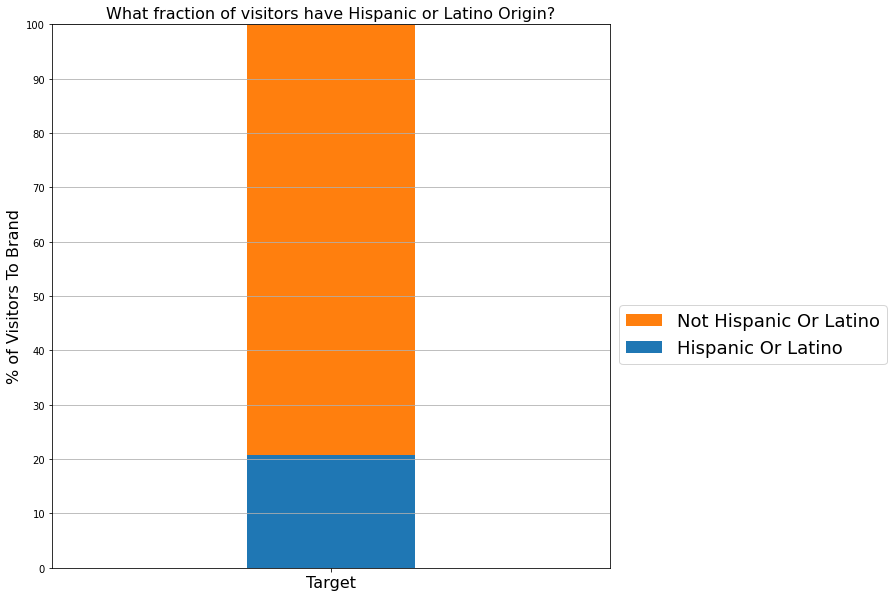

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]

demos2plot = ['Hispanic Or Latino', 'Not Hispanic Or Latino']
data2plot = [summs_target['B03003e3_percent'].iloc[0] , summs_target['B03003e2_percent'].iloc[0]]

#####
# plot a stacked bar chart
print("Figure 1")

barwidth = 0.3
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(zorder=0)
p1 = ax.bar(1, data2plot[0], barwidth)
p2 = ax.bar(1, data2plot[1], barwidth, bottom=data2plot[0])

plt.ylabel("% of Visitors To Brand", size=16)
plt.title('What fraction of visitors have Hispanic or Latino Origin?', size=16)
plt.xticks([1], summs_target.brands, size=16)
plt.yticks(list(range(0,110,10)))
plt.legend((p1[0], p2[0]), demos2plot)
plt.xlim((.5,1.5))
plt.ylim((0,100))

handles = [p1, p2]
order = [1,0] # We reverse the legend order so it matches the order on the chart
plt.legend([handles[idx] for idx in order],[demos2plot[idx] for idx in order],fontsize=18, bbox_to_anchor=(1,0.5))
plt.show()
#####

In [ ]:
home_panel = dpf.get_home_panel(None, drive=drive)
home_panel.head()

,census_block_group,number_devices_residing
0,010010201001,325
1,010010201002,152
2,010010202001,74
3,010010202002,115
4,010010203001,244


In [ ]:
# B01001e1 is the census Total Population estimate
census_totals = dpf.pd_read_csv_drive(dpf.get_drive_id('cbg_b01.csv'), drive=drive, dtype = {'census_block_group': str})[['census_block_group', 'B01001e1']] 
census_totals.head()

,census_block_group,B01001e1
0,010010201001,745
1,010010201002,1265
2,010010202001,960
3,010010202002,1236
4,010010203001,2364


In [ ]:
# Join all datasets together on census_block_group
visitors_join_target = dpf.join_visitors_census_and_panel(pd.merge(home_visitor_cbgs_target_gateway,poi_target_gateway[['safegraph_place_id', 'brands']]), 
                                              home_panel,
                                              census_df_hispanic,
                                              verbose=True)
visitors_join_target = pd.merge(visitors_join_target, census_totals, on=['census_block_group'])
visitors_join_target.head()


Shape of fully-joined dataframe: 
(885, 9)


,safegraph_place_id,visitor_count,brands,census_block_group,number_devices_residing,B03003e2,B03003e3,B03003e2_frac,B03003e3_frac,B01001e1
0,sg:f189f91419974d03a20257132d73da58,46,Target,360471070001,508,991,357,0.735163,0.264837,1348
1,sg:f189f91419974d03a20257132d73da58,33,Target,360471220002,470,2992,398,0.882596,0.117404,3390
2,sg:f189f91419974d03a20257132d73da58,32,Target,360471058044,417,2544,455,0.848283,0.151717,2999
3,sg:f189f91419974d03a20257132d73da58,28,Target,360811072011,442,2157,157,0.932152,0.067848,2314
4,sg:f189f91419974d03a20257132d73da58,25,Target,360810062012,240,1642,1072,0.605011,0.394989,2714


To distinguish this geographic-CBG-based adjustment_factor from the adjustments we made earlier to compute the demographic fractions (_D_adj), we will call this the correction for sampling_bias _cbg_adj.

In [ ]:
"""
def compute_adjust_factor(df, population_col, sample_col):
    adjust_factor = df[population_col] / df[population_col].sum() * df[sample_col].sum() / df[sample_col]
    return(adjust_factor)
    
"""
print("")

In [ ]:
visitors_target_gateway_2 = visitors_join_target.copy()
visitors_target_gateway_2['cbg_adjust_factor'] = dpf.compute_adjust_factor(visitors_target_gateway_2, 'B01001e1','number_devices_residing')
visitors_target_gateway_2['visitor_count_cbg_adj'] = visitors_target_gateway_2['visitor_count'] * visitors_target_gateway_2['cbg_adjust_factor'] # apply re-weighting, re-scaling

print(visitors_target_gateway_2.shape)
visitors_target_gateway_2.head()

(885, 12)


,safegraph_place_id,visitor_count,brands,census_block_group,number_devices_residing,B03003e2,B03003e3,B03003e2_frac,B03003e3_frac,B01001e1,cbg_adjust_factor,visitor_count_cbg_adj
0,sg:f189f91419974d03a20257132d73da58,46,Target,360471070001,508,991,357,0.735163,0.264837,1348,0.691293,31.799459
1,sg:f189f91419974d03a20257132d73da58,33,Target,360471220002,470,2992,398,0.882596,0.117404,3390,1.879047,62.008539
2,sg:f189f91419974d03a20257132d73da58,32,Target,360471058044,417,2544,455,0.848283,0.151717,2999,1.873597,59.955097
3,sg:f189f91419974d03a20257132d73da58,28,Target,360811072011,442,2157,157,0.932152,0.067848,2314,1.363882,38.188697
4,sg:f189f91419974d03a20257132d73da58,25,Target,360810062012,240,1642,1072,0.605011,0.394989,2714,2.946011,73.650268


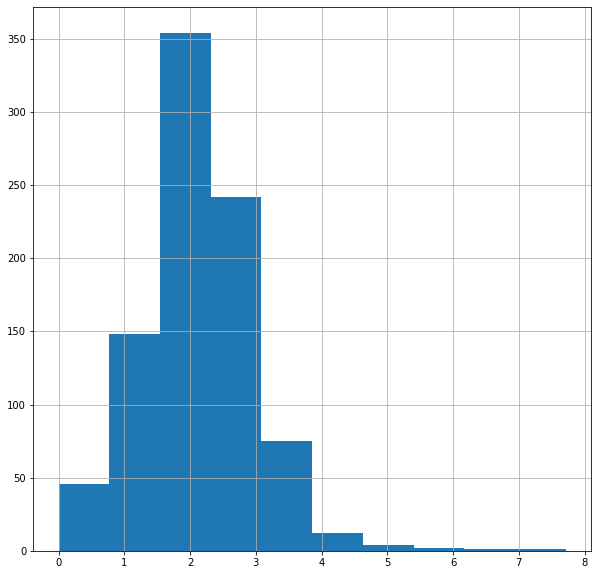

In [ ]:
visitors_target_gateway_2.cbg_adjust_factor.hist()

Inspecting the cbg_adjust_factor shows that for some CBGs the SafeGraph data is very proportionally representative, but for others the SafeGraph data is very over or under-indexed. When cbg_adjust_factor < 1, SafeGraph is over-indexed relative to population.

We now repeat our steps to visualize the profile before and after the stratified re-weighting correction.

In [ ]:
demos_target2 = visitors_target_gateway_2.copy()

columns_to_keep = []
for dc in hispanic_demo_codes:
    demos_target2['visitor_count_cbg_adj_'+dc+'_D_adj'] = demos_target2[dc+'_frac'] * demos_target2['visitor_count_cbg_adj'] # This is our corrected estimate, as a fraction
    demos_target2['visitor_count_'+dc+'_D_adj'] = demos_target2[dc+'_frac'] * demos_target2['visitor_count'] # We keep track of the non-corrected measurement for stats purposes (explained in Section 3)
    columns_to_keep = columns_to_keep + ['visitor_count_'+dc+'_D_adj', 'visitor_count_cbg_adj_'+dc+'_D_adj']

columns_to_keep = ['brands','visitor_count', 'visitor_count_cbg_adj'] + columns_to_keep
sums_temp2 = demos_target2[columns_to_keep].copy()
summs_target2 = sums_temp2.groupby(['brands']).sum().reset_index() # Sum all rows (all CBGs)
summs_target2

,brands,visitor_count,visitor_count_cbg_adj,visitor_count_B03003e2_D_adj,visitor_count_cbg_adj_B03003e2_D_adj,visitor_count_B03003e3_D_adj,visitor_count_cbg_adj_B03003e3_D_adj
0,Target,5108,10620.247168,4040.288406,8458.996323,1063.711594,2161.250845


So, visitor_count_cbg_adj_B03003e3_D_adj is our corrected estimate of the total number of visitors to Walmart from the demographic group B03003e3 (Hispanic Or Latino Origin).

_cbg_adj is shorthand for the census_block_group-based geographic stratified correction
_D_adj is shorthand for the demographic adjustment. This is the product of our original visitor_count multplied by the demographic fraction.
We've dropped other columns.

Figure 2
[20.82, 20.35, 79.1, 79.65]


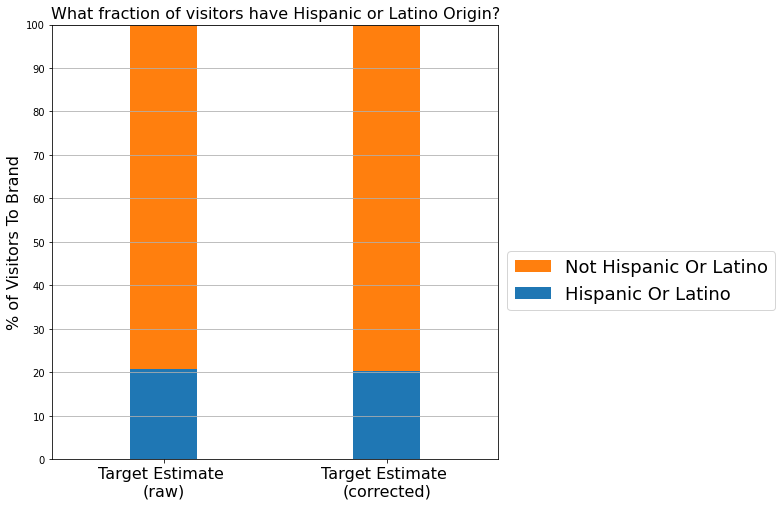

In [ ]:
print("Figure 2")
demos2plot2 = ['Hispanic Or Latino', 'Not Hispanic Or Latino']
totals2 = [summs_target2.visitor_count[0],summs_target2.visitor_count_cbg_adj[0]]
data2plot2 = [summs_target2.visitor_count_B03003e3_D_adj[0] / totals2[0] * 100 , 
             summs_target2.visitor_count_cbg_adj_B03003e3_D_adj[0] / totals2[1] * 100 , 
             summs_target2.visitor_count_B03003e2_D_adj[0] / totals2[0] * 100,
             summs_target2.visitor_count_cbg_adj_B03003e2_D_adj[0] / totals2[1] * 100
            ]
print([round(datum,2) for datum in data2plot2]) 

barwidth = 0.3
idx = [1,2]

plt.rcParams['figure.figsize'] = [8, 8]
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(zorder=0)
p1 = ax.bar(idx, data2plot2[0:2], barwidth)
p2 = ax.bar(idx, data2plot2[2:4], barwidth, bottom=data2plot2[0:2])

plt.ylabel("% of Visitors To Brand", size=16)
plt.title('What fraction of visitors have Hispanic or Latino Origin?', size=16)
plt.xticks(idx, [summs_target2.brands[0] + ' Estimate \n(raw)',summs_target2.brands[0] + ' Estimate \n(corrected)'] , size=16)
plt.yticks(list(range(0,110,10)))
plt.legend((p1[0], p2[0]), demos2plot2)
plt.xlim((idx[0] - 0.5, idx[-1] + .5))
plt.ylim((0,100))

handles2 = [p1, p2]
order2 = [1,0] # We want to reverse the legend order so it matches the order on the chart
plt.legend([handles2[idx] for idx in order2],[demos2plot2[idx] for idx in order2],fontsize=18, bbox_to_anchor=(1,0.5))
plt.show()


In [ ]:
demographic_options = {'Sex By Age': True,
                         'Race' : True,
                         'Hispanic Or Latino Origin': True,
                         'Educational Attainment For The Population 25 Years And Over': True, 
                         'Aggregate Household Income In The Past 12 Months (In 2016 Inflation-Adjusted Dollars)': True
                        }
# ~~~~
demos_to_analyze = [demo for demo, to_use in demographic_options.items() if to_use]
print("We will analyze the following dimensions:")
for demo in demos_to_analyze: print(demo)

We will analyze the following dimensions:
Sex By Age
Race
Hispanic Or Latino Origin
Educational Attainment For The Population 25 Years And Over
Aggregate Household Income In The Past 12 Months (In 2016 Inflation-Adjusted Dollars)


In [ ]:
#From here you can continue reading the "Guide to Build Demographic Profile" from #2 Wrangling Census Data, and repeat the analysis! 

#Or if that doesn't work, we can always implement our own graphs which do the same thing. 

In [ ]:
%%time
print("This will take 60-90 seconds to read all the census files and re-aggregate")

# Read the appropriate census files, given the categories requested, perform aggregations
census_df, cbg_field_desc = dpf.get_raw_census_data(demos_to_analyze, None, drive=drive, verbose=True)
census_df, cbg_field_desc_mod = dpf.reaggregate_census_data(census_df, cbg_field_desc, demos_to_analyze, verbose=True)

# add new columns which re-normalize counts to fraction-within-demo-category for each CBG
census_df = dpf.normalize_demos_to_fractions(census_df, demos_to_analyze, verbose=True)
census_df[['census_block_group'] + list(census_df.columns)].head()

This will take 60-90 seconds to read all the census files and re-aggregate
Pulling census data from <pydrive.drive.GoogleDrive object at 0x7f91d55f72d0> for:
Sex By Age
Race
Hispanic Or Latino Origin
Educational Attainment For The Population 25 Years And Over
Aggregate Household Income In The Past 12 Months (In 2016 Inflation-Adjusted Dollars)
Starting reaggregations (this is a slow step).
census data starting shape: 
(220333, 1029)
Education aggregation complete.
(220333, 1010)
Age aggregation complete.
(220333, 973)
Income aggregation complete.
(220333, 960)
Dropped unused columns.
(220333, 22)
Added normalized columns as fractions.
(220333, 42)
CPU times: user 42.9 s, sys: 6.49 s, total: 49.4 s
Wall time: 1min 18s


In [ ]:
print(census_df.shape)
census_df[['census_block_group'] + list(census_df.columns)].head()

(220333, 42)


,census_block_group,B01P1529,B01P3049,B01P50ov,B02001e2,B02001e3,B02001e4,B02001e5,B02001e6,B02001e7,B02001e8,B03003e3,B03003e2,B15003aa,B15003bb,B15003cc,B15003dd,B15003ee,B19xxx59,B1960x99,B19100xx,census_block_group,B01001e1,B01P1529_frac,B01P3049_frac,B01P50ov_frac,B02001e2_frac,B02001e3_frac,B02001e4_frac,B02001e5_frac,B02001e6_frac,B02001e7_frac,B02001e8_frac,B03003e3_frac,B03003e2_frac,B15003aa_frac,B15003bb_frac,B15003cc_frac,B15003dd_frac,B15003ee_frac,B19xxx59_frac,B1960x99_frac,B19100xx_frac
0,010010201001,134,203,242,585,160,0,0,0,0,0,16,729,103,149,116,60,46,171,78,35,010010201001,745,0.231434,0.350604,0.417962,0.785235,0.214765,0.000000,0.000000,0.000000,0.000000,0.000000,0.021477,0.978523,0.217300,0.314346,0.244726,0.126582,0.097046,0.602113,0.274648,0.123239
1,010010201002,293,327,468,1083,104,0,9,0,0,69,37,1228,64,267,192,156,145,160,158,138,010010201002,1265,0.269301,0.300551,0.430147,0.856126,0.082213,0.000000,0.007115,0.000000,0.000000,0.054545,0.029249,0.970751,0.077670,0.324029,0.233010,0.189320,0.175971,0.350877,0.346491,0.302632
2,010010202001,194,233,318,361,568,0,0,13,0,18,13,947,121,262,149,54,16,256,117,13,010010202001,960,0.260403,0.312752,0.426846,0.376042,0.591667,0.000000,0.000000,0.013542,0.000000,0.018750,0.013542,0.986458,0.200997,0.435216,0.247508,0.089701,0.026578,0.663212,0.303109,0.033679
3,010010202002,280,467,305,615,571,0,24,0,10,16,15,1221,153,314,227,113,54,293,60,99,010010202002,1236,0.266160,0.443916,0.289924,0.497573,0.461974,0.000000,0.019417,0.000000,0.008091,0.012945,0.012136,0.987864,0.177700,0.364692,0.263647,0.131243,0.062718,0.648230,0.132743,0.219027
4,010010203001,424,779,665,1481,515,22,27,6,228,85,228,2136,208,576,498,205,161,494,203,127,010010203001,2364,0.226981,0.417024,0.355996,0.626481,0.217851,0.009306,0.011421,0.002538,0.096447,0.035956,0.096447,0.903553,0.126214,0.349515,0.302184,0.124393,0.097694,0.599515,0.246359,0.154126


In [ ]:
home_visitor_cbgs_target_gateway

,safegraph_place_id,visitor_home_cbg,visitor_count
0,sg:f189f91419974d03a20257132d73da58,360471070001,46
1,sg:f189f91419974d03a20257132d73da58,360471220002,33
2,sg:f189f91419974d03a20257132d73da58,360471058044,32
3,sg:f189f91419974d03a20257132d73da58,360811072011,28
4,sg:f189f91419974d03a20257132d73da58,360810062012,25
...,...,...,...
880,sg:f189f91419974d03a20257132d73da58,360470331003,4
881,sg:f189f91419974d03a20257132d73da58,360470738001,4
882,sg:f189f91419974d03a20257132d73da58,340130117002,4
883,sg:f189f91419974d03a20257132d73da58,360470456002,4


In [ ]:
# Target Gateway _ Originally what you had
visitors_join = dpf.join_visitors_census_and_panel(home_visitor_cbgs_target_gateway, home_panel, census_df, verbose=True)
visitors_join['cbg_adjust_factor'] = dpf.compute_adjust_factor(visitors_join, 'B01001e1','number_devices_residing')
visitors_join['visitor_count_cbg_adj'] = visitors_join['visitor_count'] * visitors_join['cbg_adjust_factor']
visitors_join.head()

Shape of fully-joined dataframe: 
(885, 45)


,safegraph_place_id,visitor_count,census_block_group,number_devices_residing,B01P1529,B01P3049,B01P50ov,B02001e2,B02001e3,B02001e4,B02001e5,B02001e6,B02001e7,B02001e8,B03003e3,B03003e2,B15003aa,B15003bb,B15003cc,B15003dd,B15003ee,B19xxx59,B1960x99,B19100xx,B01001e1,B01P1529_frac,B01P3049_frac,B01P50ov_frac,B02001e2_frac,B02001e3_frac,B02001e4_frac,B02001e5_frac,B02001e6_frac,B02001e7_frac,B02001e8_frac,B03003e3_frac,B03003e2_frac,B15003aa_frac,B15003bb_frac,B15003cc_frac,B15003dd_frac,B15003ee_frac,B19xxx59_frac,B1960x99_frac,B19100xx_frac,cbg_adjust_factor,visitor_count_cbg_adj
0,sg:f189f91419974d03a20257132d73da58,46,360471070001,508,331,404,339,93,958,0,89,0,145,63,357,991,72,226,200,200,149,221,171,179,1348,0.308194,0.376164,0.315642,0.068991,0.710682,0.000000,0.066024,0.0,0.107567,0.046736,0.264837,0.735163,0.085006,0.266824,0.236128,0.236128,0.175915,0.387040,0.299475,0.313485,0.691293,31.799459
1,sg:f189f91419974d03a20257132d73da58,33,360471220002,470,757,958,951,223,2864,0,35,0,268,0,398,2992,220,1033,531,472,114,586,271,294,3390,0.283946,0.359340,0.356714,0.065782,0.844838,0.000000,0.010324,0.0,0.079056,0.000000,0.117404,0.882596,0.092827,0.435865,0.224051,0.199156,0.048101,0.509123,0.235447,0.255430,1.879047,62.008539
2,sg:f189f91419974d03a20257132d73da58,32,360471058044,417,642,765,1067,605,1946,41,253,0,92,62,455,2544,421,489,864,90,149,945,176,146,2999,0.259499,0.309216,0.431285,0.201734,0.648883,0.013671,0.084361,0.0,0.030677,0.020674,0.151717,0.848283,0.209141,0.242921,0.429210,0.044709,0.074019,0.745856,0.138911,0.115233,1.873597,59.955097
3,sg:f189f91419974d03a20257132d73da58,28,360811072011,442,320,685,798,2222,12,0,5,0,0,75,157,2157,219,536,475,181,176,302,241,316,2314,0.177482,0.379922,0.442596,0.960242,0.005186,0.000000,0.002161,0.0,0.000000,0.032411,0.067848,0.932152,0.137996,0.337744,0.299307,0.114052,0.110901,0.351572,0.280559,0.367870,1.363882,38.188697
4,sg:f189f91419974d03a20257132d73da58,25,360810062012,240,292,887,843,1604,88,0,236,0,484,302,1072,1642,103,504,561,383,258,395,232,357,2714,0.144411,0.438675,0.416914,0.591010,0.032424,0.000000,0.086957,0.0,0.178335,0.111275,0.394989,0.605011,0.056938,0.278607,0.310116,0.211719,0.142620,0.401423,0.235772,0.362805,2.946011,73.650268


In [ ]:
# For Other 7 Targets

# 34th
visitors_join_34th = dpf.join_visitors_census_and_panel(home_visitor_cbgs_target_34th, home_panel, census_df, verbose=True)
visitors_join_34th['cbg_adjust_factor'] = dpf.compute_adjust_factor(visitors_join_34th, 'B01001e1','number_devices_residing')
visitors_join_34th['visitor_count_cbg_adj'] = visitors_join_34th['visitor_count'] * visitors_join_34th['cbg_adjust_factor']

# 13th
visitors_join_13th = dpf.join_visitors_census_and_panel(home_visitor_cbgs_target_13th, home_panel, census_df, verbose=True)
visitors_join_13th['cbg_adjust_factor'] = dpf.compute_adjust_factor(visitors_join_13th, 'B01001e1','number_devices_residing')
visitors_join_13th['visitor_count_cbg_adj'] = visitors_join_13th['visitor_count'] * visitors_join_13th['cbg_adjust_factor']

# Grand
visitors_join_Grand = dpf.join_visitors_census_and_panel(home_visitor_cbgs_target_Grand, home_panel, census_df, verbose=True)
visitors_join_Grand['cbg_adjust_factor'] = dpf.compute_adjust_factor(visitors_join_Grand, 'B01001e1','number_devices_residing')
visitors_join_Grand['visitor_count_cbg_adj'] = visitors_join_Grand['visitor_count'] * visitors_join_Grand['cbg_adjust_factor']

#18th
visitors_join_18th = dpf.join_visitors_census_and_panel(home_visitor_cbgs_target_18th, home_panel, census_df, verbose=True)
visitors_join_18th['cbg_adjust_factor'] = dpf.compute_adjust_factor(visitors_join_18th, 'B01001e1','number_devices_residing')
visitors_join_18th['visitor_count_cbg_adj'] = visitors_join_18th['visitor_count'] * visitors_join_18th['cbg_adjust_factor']

# Flatbush
visitors_join_Flatbush = dpf.join_visitors_census_and_panel(home_visitor_cbgs_target_Flatbush, home_panel, census_df, verbose=True)
visitors_join_Flatbush['cbg_adjust_factor'] = dpf.compute_adjust_factor(visitors_join_Flatbush, 'B01001e1','number_devices_residing')
visitors_join_Flatbush['visitor_count_cbg_adj'] = visitors_join_Flatbush['visitor_count'] * visitors_join_Flatbush['cbg_adjust_factor']

# Albee
visitors_join_Albee = dpf.join_visitors_census_and_panel(home_visitor_cbgs_target_Albee, home_panel, census_df, verbose=True)
visitors_join_Albee['cbg_adjust_factor'] = dpf.compute_adjust_factor(visitors_join_Albee, 'B01001e1','number_devices_residing')
visitors_join_Albee['visitor_count_cbg_adj'] = visitors_join_Albee['visitor_count'] * visitors_join_Albee['cbg_adjust_factor']

# Greenwich
visitors_join_Greenwich = dpf.join_visitors_census_and_panel(home_visitor_cbgs_target_Greenwich, home_panel, census_df, verbose=True)
visitors_join_Greenwich['cbg_adjust_factor'] = dpf.compute_adjust_factor(visitors_join_Greenwich, 'B01001e1','number_devices_residing')
visitors_join_Greenwich['visitor_count_cbg_adj'] = visitors_join_Greenwich['visitor_count'] * visitors_join_Greenwich['cbg_adjust_factor']

# not sure for this..
visitors_join_34th['brands']='Target'
visitors_join_13th['brands']='Target'
visitors_join_Grand['brands']='Target'
visitors_join_18th['brands']='Target'
visitors_join_Flatbush['brands']='Target'
visitors_join_Albee['brands']='Target'
visitors_join_Greenwich['brands']='Target'

Shape of fully-joined dataframe: 
(883, 45)


In [ ]:
visitors_join['brands']='Target'
visitors_join.head()

,safegraph_place_id,visitor_count,census_block_group,number_devices_residing,B01P1529,B01P3049,B01P50ov,B02001e2,B02001e3,B02001e4,B02001e5,B02001e6,B02001e7,B02001e8,B03003e3,B03003e2,B15003aa,B15003bb,B15003cc,B15003dd,B15003ee,B19xxx59,B1960x99,B19100xx,B01001e1,B01P1529_frac,B01P3049_frac,B01P50ov_frac,B02001e2_frac,B02001e3_frac,B02001e4_frac,B02001e5_frac,B02001e6_frac,B02001e7_frac,B02001e8_frac,B03003e3_frac,B03003e2_frac,B15003aa_frac,B15003bb_frac,B15003cc_frac,B15003dd_frac,B15003ee_frac,B19xxx59_frac,B1960x99_frac,B19100xx_frac,cbg_adjust_factor,visitor_count_cbg_adj,brands
0,sg:f189f91419974d03a20257132d73da58,46,360471070001,508,331,404,339,93,958,0,89,0,145,63,357,991,72,226,200,200,149,221,171,179,1348,0.308194,0.376164,0.315642,0.068991,0.710682,0.000000,0.066024,0.0,0.107567,0.046736,0.264837,0.735163,0.085006,0.266824,0.236128,0.236128,0.175915,0.387040,0.299475,0.313485,0.691293,31.799459,Target
1,sg:f189f91419974d03a20257132d73da58,33,360471220002,470,757,958,951,223,2864,0,35,0,268,0,398,2992,220,1033,531,472,114,586,271,294,3390,0.283946,0.359340,0.356714,0.065782,0.844838,0.000000,0.010324,0.0,0.079056,0.000000,0.117404,0.882596,0.092827,0.435865,0.224051,0.199156,0.048101,0.509123,0.235447,0.255430,1.879047,62.008539,Target
2,sg:f189f91419974d03a20257132d73da58,32,360471058044,417,642,765,1067,605,1946,41,253,0,92,62,455,2544,421,489,864,90,149,945,176,146,2999,0.259499,0.309216,0.431285,0.201734,0.648883,0.013671,0.084361,0.0,0.030677,0.020674,0.151717,0.848283,0.209141,0.242921,0.429210,0.044709,0.074019,0.745856,0.138911,0.115233,1.873597,59.955097,Target
3,sg:f189f91419974d03a20257132d73da58,28,360811072011,442,320,685,798,2222,12,0,5,0,0,75,157,2157,219,536,475,181,176,302,241,316,2314,0.177482,0.379922,0.442596,0.960242,0.005186,0.000000,0.002161,0.0,0.000000,0.032411,0.067848,0.932152,0.137996,0.337744,0.299307,0.114052,0.110901,0.351572,0.280559,0.367870,1.363882,38.188697,Target
4,sg:f189f91419974d03a20257132d73da58,25,360810062012,240,292,887,843,1604,88,0,236,0,484,302,1072,1642,103,504,561,383,258,395,232,357,2714,0.144411,0.438675,0.416914,0.591010,0.032424,0.000000,0.086957,0.0,0.178335,0.111275,0.394989,0.605011,0.056938,0.278607,0.310116,0.211719,0.142620,0.401423,0.235772,0.362805,2.946011,73.650268,Target


In [ ]:
demo_summary_0 = dpf.allocate_sum_wrangle_demos(visitors_join, demos_to_analyze, verbose=True)
demo_summary_0.head(10)

Allocated counts for Sex By Age. df shape: (885, 54)
Allocated counts for Race. df shape: (885, 68)
Allocated counts for Hispanic Or Latino Origin. df shape: (885, 72)
Allocated counts for Educational Attainment For The Population 25 Years And Over. df shape: (885, 82)
Allocated counts for Aggregate Household Income In The Past 12 Months (In 2016 Inflation-Adjusted Dollars). df shape: (885, 88)
summed data. df shape: (1, 46)
wrangled data: df shape: (20, 5)


,demo_code,visitor_count_D_adj,visitor_count_POP_D_adj,brands,cbg_count
0,B01P1529,1364.76,2812.02,Target,885
1,B01P3049,1678.87,3478.47,Target,885
2,B01P50ov,2060.38,4329.76,Target,885
3,B02001e2,1668.07,3750.82,Target,885
4,B02001e3,2366.37,4530.73,Target,885
5,B02001e4,19.8797,42.3375,Target,885
6,B02001e5,428.136,1012.89,Target,885
7,B02001e6,1.92994,4.96877,Target,885
8,B02001e7,482.783,996.715,Target,885
9,B02001e8,136.829,281.784,Target,885


In [ ]:
# Also for other 7 Targets
demo_summary_1 = dpf.allocate_sum_wrangle_demos(visitors_join_34th, demos_to_analyze, verbose=True)
demo_summary_2 = dpf.allocate_sum_wrangle_demos(visitors_join_13th, demos_to_analyze, verbose=True)
demo_summary_3 = dpf.allocate_sum_wrangle_demos(visitors_join_Grand, demos_to_analyze, verbose=True)
demo_summary_4 = dpf.allocate_sum_wrangle_demos(visitors_join_18th, demos_to_analyze, verbose=True)
demo_summary_5 = dpf.allocate_sum_wrangle_demos(visitors_join_Flatbush, demos_to_analyze, verbose=True)
demo_summary_6 = dpf.allocate_sum_wrangle_demos(visitors_join_Albee, demos_to_analyze, verbose=True)
demo_summary_7 = dpf.allocate_sum_wrangle_demos(visitors_join_Greenwich, demos_to_analyze, verbose=True)

Allocated counts for Sex By Age. df shape: (883, 54)
Allocated counts for Race. df shape: (883, 68)
Allocated counts for Hispanic Or Latino Origin. df shape: (883, 72)
Allocated counts for Educational Attainment For The Population 25 Years And Over. df shape: (883, 82)
Allocated counts for Aggregate Household Income In The Past 12 Months (In 2016 Inflation-Adjusted Dollars). df shape: (883, 88)
summed data. df shape: (1, 46)
wrangled data: df shape: (20, 5)
Allocated counts for Sex By Age. df shape: (224, 54)
Allocated counts for Race. df shape: (224, 68)
Allocated counts for Hispanic Or Latino Origin. df shape: (224, 72)
Allocated counts for Educational Attainment For The Population 25 Years And Over. df shape: (224, 82)
Allocated counts for Aggregate Household Income In The Past 12 Months (In 2016 Inflation-Adjusted Dollars). df shape: (224, 88)
summed data. df shape: (1, 46)
wrangled data: df shape: (20, 5)
Allocated counts for Sex By Age. df shape: (198, 54)
Allocated counts for Ra

In [ ]:
# Original_Gateway
final_results_ = dpf.get_totals_for_each_brand_and_demo(demo_summary_0, cbg_field_desc_mod, sample_col = 'visitor_count_POP_D_adj')
final_results_ = dpf.convert_cols_to_frac_of_total(final_results_, ['visitor_count_POP_D_adj'], 'visitor_count_POP_D_adj_total')
final_results_ = pd.merge(final_results_, cbg_field_desc_mod, left_on = 'demo_code', right_on='table_id').dropna(axis=1,how='all')
final_results_.head()

,demo_code,visitor_count_D_adj,visitor_count_POP_D_adj,brands,cbg_count,demo_category,visitor_count_POP_D_adj_total,visitor_count_POP_D_adj_rate,field_full_name,field_level_1,field_level_2,field_level_3,table_id
0,B01P1529,1364.76,2812.02,Target,885,Sex By Age,10620.247168,0.264779,NaN,Sex By Age,Ages 15-29,Total Population -- (Estimate),B01P1529
1,B01P3049,1678.87,3478.47,Target,885,Sex By Age,10620.247168,0.327531,NaN,Sex By Age,Ages 30-49,Total Population -- (Estimate),B01P3049
2,B01P50ov,2060.38,4329.76,Target,885,Sex By Age,10620.247168,0.407689,NaN,Sex By Age,Ages 50 and over,Total Population -- (Estimate),B01P50ov
3,B02001e2,1668.07,3750.82,Target,885,Race,10620.247168,0.353177,RACE: White alone: Total population -- (Estimate),Race,White Alone,Total Population -- (Estimate),B02001e2
4,B02001e3,2366.37,4530.73,Target,885,Race,10620.247168,0.426612,RACE: Black or African American alone: Total p...,Race,Black Or African American Alone,Total Population -- (Estimate),B02001e3


In [ ]:
# For other 7 Targets
final_results_1 = dpf.get_totals_for_each_brand_and_demo(demo_summary_1, cbg_field_desc_mod, sample_col = 'visitor_count_POP_D_adj')
final_results_1 = dpf.convert_cols_to_frac_of_total(final_results_1, ['visitor_count_POP_D_adj'], 'visitor_count_POP_D_adj_total')
final_results_1 = pd.merge(final_results_1, cbg_field_desc_mod, left_on = 'demo_code', right_on='table_id').dropna(axis=1,how='all')

final_results_2 = dpf.get_totals_for_each_brand_and_demo(demo_summary_2, cbg_field_desc_mod, sample_col = 'visitor_count_POP_D_adj')
final_results_2 = dpf.convert_cols_to_frac_of_total(final_results_2, ['visitor_count_POP_D_adj'], 'visitor_count_POP_D_adj_total')
final_results_2 = pd.merge(final_results_2, cbg_field_desc_mod, left_on = 'demo_code', right_on='table_id').dropna(axis=1,how='all')

final_results_3 = dpf.get_totals_for_each_brand_and_demo(demo_summary_3, cbg_field_desc_mod, sample_col = 'visitor_count_POP_D_adj')
final_results_3 = dpf.convert_cols_to_frac_of_total(final_results_3, ['visitor_count_POP_D_adj'], 'visitor_count_POP_D_adj_total')
final_results_3 = pd.merge(final_results_3, cbg_field_desc_mod, left_on = 'demo_code', right_on='table_id').dropna(axis=1,how='all')

final_results_4 = dpf.get_totals_for_each_brand_and_demo(demo_summary_4, cbg_field_desc_mod, sample_col = 'visitor_count_POP_D_adj')
final_results_4 = dpf.convert_cols_to_frac_of_total(final_results_4, ['visitor_count_POP_D_adj'], 'visitor_count_POP_D_adj_total')
final_results_4 = pd.merge(final_results_4, cbg_field_desc_mod, left_on = 'demo_code', right_on='table_id').dropna(axis=1,how='all')

final_results_5 = dpf.get_totals_for_each_brand_and_demo(demo_summary_5, cbg_field_desc_mod, sample_col = 'visitor_count_POP_D_adj')
final_results_5 = dpf.convert_cols_to_frac_of_total(final_results_5, ['visitor_count_POP_D_adj'], 'visitor_count_POP_D_adj_total')
final_results_5 = pd.merge(final_results_5, cbg_field_desc_mod, left_on = 'demo_code', right_on='table_id').dropna(axis=1,how='all')

final_results_6 = dpf.get_totals_for_each_brand_and_demo(demo_summary_6, cbg_field_desc_mod, sample_col = 'visitor_count_POP_D_adj')
final_results_6 = dpf.convert_cols_to_frac_of_total(final_results_6, ['visitor_count_POP_D_adj'], 'visitor_count_POP_D_adj_total')
final_results_6 = pd.merge(final_results_6, cbg_field_desc_mod, left_on = 'demo_code', right_on='table_id').dropna(axis=1,how='all')

final_results_7 = dpf.get_totals_for_each_brand_and_demo(demo_summary_7, cbg_field_desc_mod, sample_col = 'visitor_count_POP_D_adj')
final_results_7 = dpf.convert_cols_to_frac_of_total(final_results_7, ['visitor_count_POP_D_adj'], 'visitor_count_POP_D_adj_total')
final_results_7 = pd.merge(final_results_7, cbg_field_desc_mod, left_on = 'demo_code', right_on='table_id').dropna(axis=1,how='all')

Figure 3


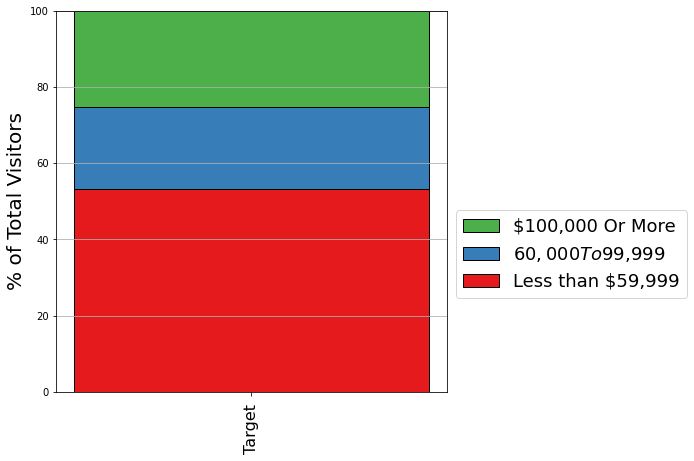

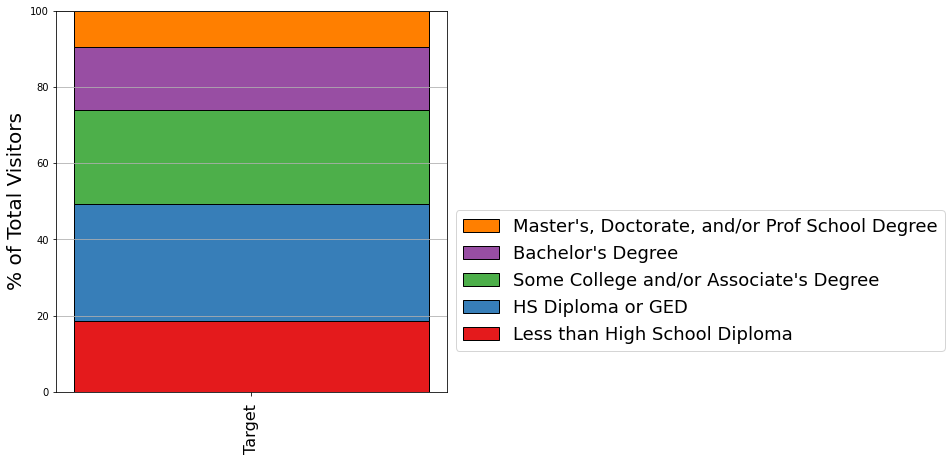

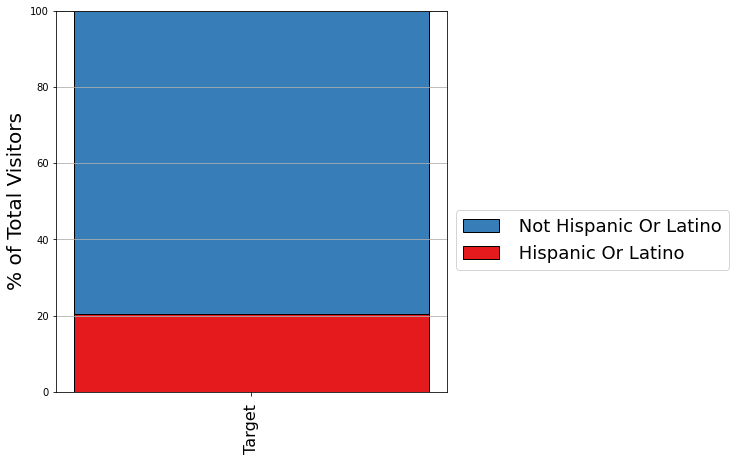

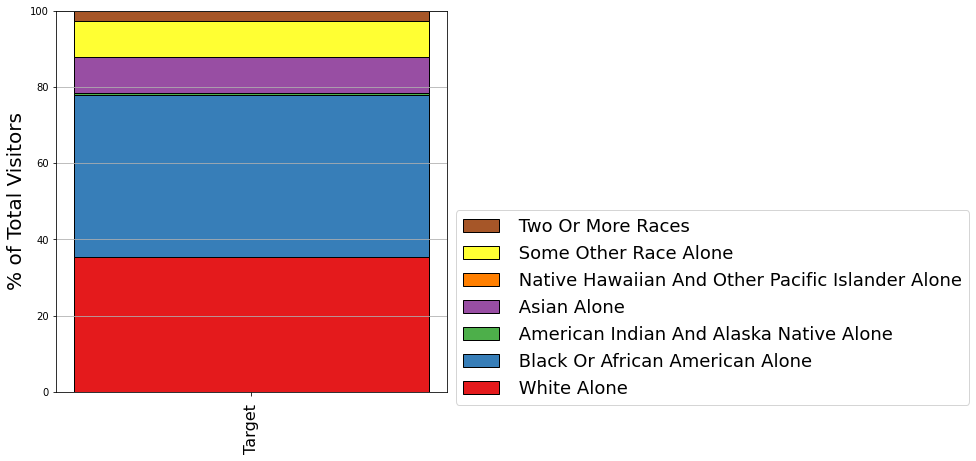

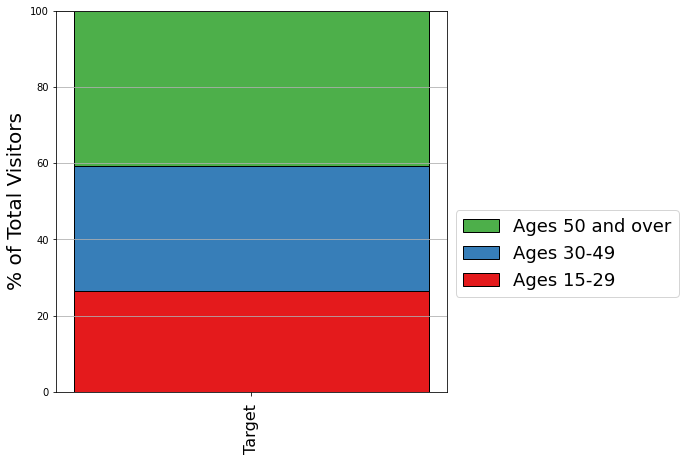

In [ ]:
print("Figure 3")
for demo in demos_to_analyze[::-1]:
    demo_codes = dpf.get_final_table_ids(demo)
    data2plot_ = final_results_[final_results_.demo_code.isin(demo_codes)]
    dpf.make_demographics_chart(data2plot_, chart_type='stacked_bar', column_to_plot='visitor_count_POP_D_adj_rate', bar_groups='field_level_2', fig_size=[7,7])

Figure 5


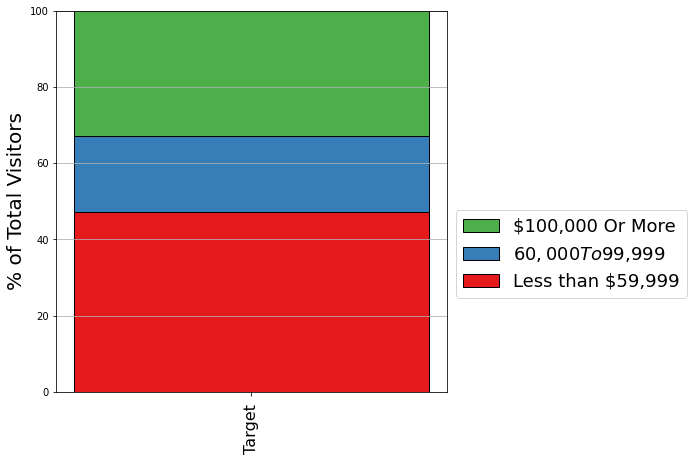

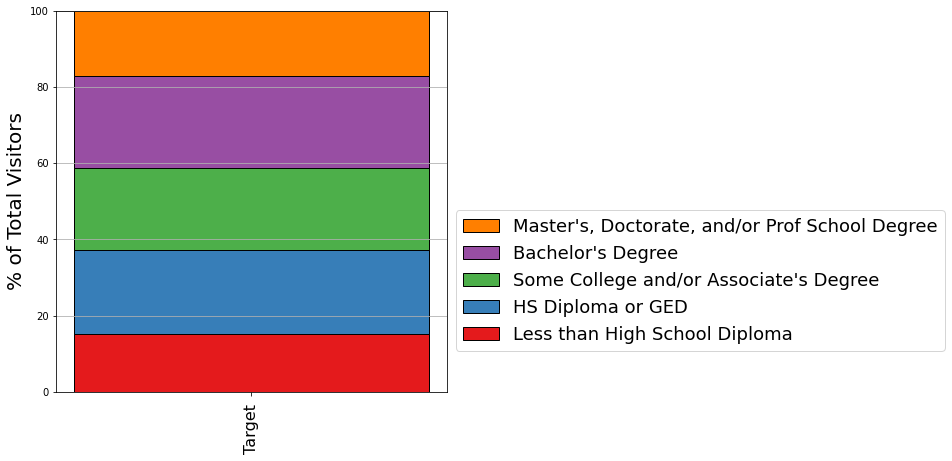

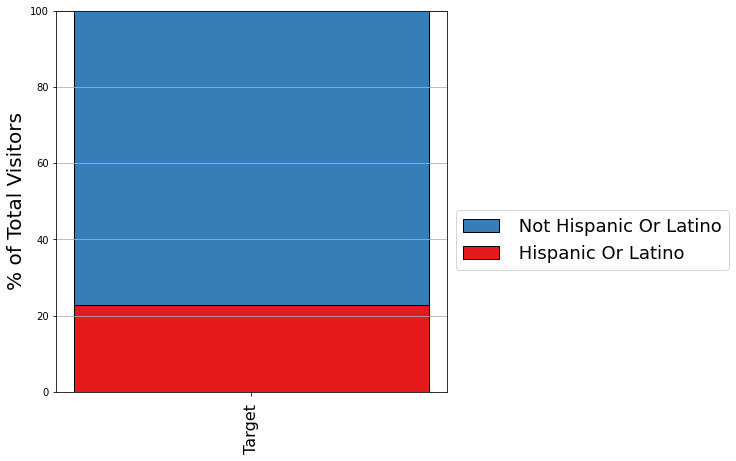

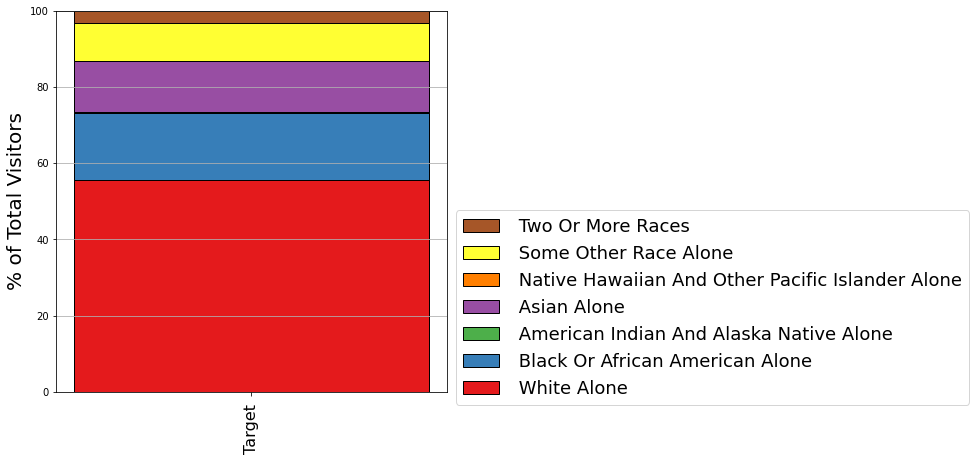

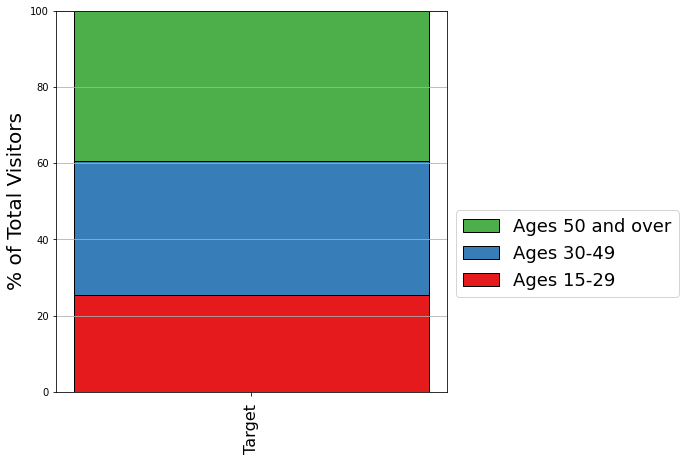

In [ ]:
# Target_34th
print("Figure 5")
for demo in demos_to_analyze[::-1]:
    demo_codes = dpf.get_final_table_ids(demo)
    data2plot_1 = final_results_1[final_results_1.demo_code.isin(demo_codes)]
    dpf.make_demographics_chart(data2plot_1, chart_type='stacked_bar', column_to_plot='visitor_count_POP_D_adj_rate', bar_groups='field_level_2', fig_size=[7,7])

In [ ]:
%%time
brands_list = ['Target']
demos_to_analyze_2 = ['Aggregate Household Income In The Past 12 Months (In 2016 Inflation-Adjusted Dollars)']
visitors_join_2, final_results_2 = dpf.master_demo_analysis(None, 
                                                        None, 
                                                        drive,
                                                        demos_to_analyze_2,
                                                        brands_list, 
                                                        None, 
                                                        verbose=False)

CPU times: user 28.6 s, sys: 6.36 s, total: 35 s
Wall time: 53.3 s


Figure 4


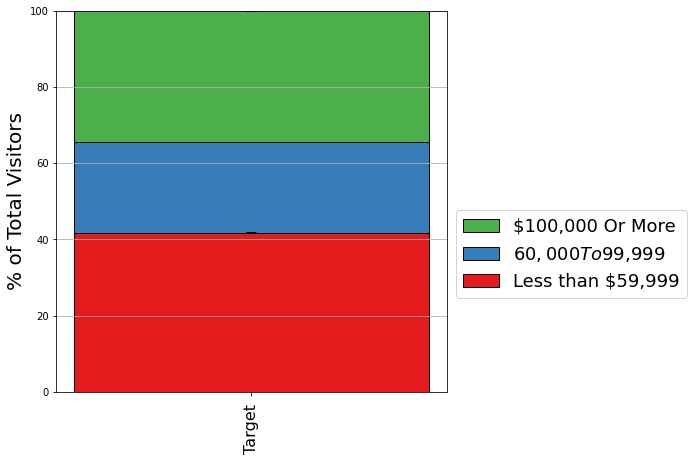

In [ ]:
print("Figure 4")
income_demo_ = 'Aggregate Household Income In The Past 12 Months (In 2016 Inflation-Adjusted Dollars)'
data2plot_2 = final_results_2[final_results_2.demo_code.isin(dpf.get_final_table_ids(income_demo_))]
dpf.make_demographics_chart(data2plot_2, chart_type='stacked_bar', show_error=True, fig_size=[7,7])

In [ ]:
# Edit Target brand field to include their address